In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset
raw_data = load_breast_cancer()
tumor_data = pd.DataFrame(raw_data.data, raw_data.target, columns=raw_data.feature_names) # Converting to Pandas df
tumor_data['label'] = raw_data.target
tumor_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dimensions of data: (569, 31)


Text(0.5, 1.0, 'Distribution of Malignant and Benign masses')

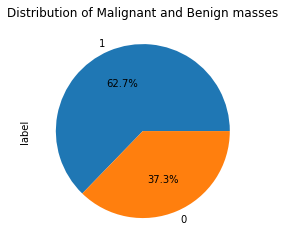

In [2]:
print('Dimensions of data:', tumor_data.shape)
%matplotlib inline
tumor_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Malignant and Benign masses')

In [3]:
# -
bins = 10
malignant_data = tumor_data[tumor_data.label == 1]
benign_data = tumor_data[tumor_data.label == 0]

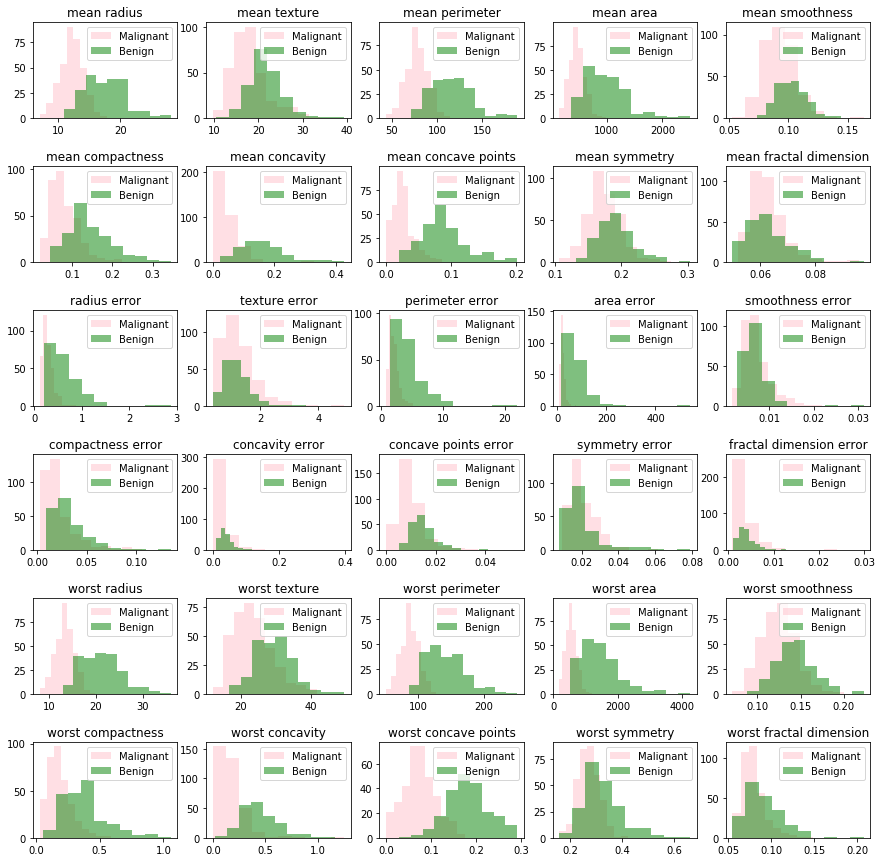

In [4]:
from matplotlib import pyplot

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
idx = 0

for x_i in range(0, 6):
    for y_i in range(0, 5):
        ax[x_i, y_i].hist(malignant_data.iloc[:,idx], bins, alpha=0.5, label='Malignant', color='pink')
        ax[x_i, y_i].hist(benign_data.iloc[:,idx], bins, alpha=0.5, label='Benign', color='green')
        ax[x_i, y_i].legend(loc='upper right')
        ax[x_i,y_i].set_title(tumor_data.columns[idx])
        idx += 1

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = tumor_data.iloc[:, 0:-1]
Y = tumor_data.iloc[:, -1]
print('Scaled features')
X = sc.fit_transform(X)
X

Scaled features


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [6]:
from sklearn.model_selection import train_test_split

# Reserving 20% of the data as test set.
print('Splitting the data into training and test sets')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('Training set:', X_train.shape)
print('Testing set:', X_test.shape)

Splitting the data into training and test sets
Training set: (455, 30)
Testing set: (114, 30)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
print('Training a Decision Tree classifier on the training data')
clf.fit(X_train, Y_train)

Training a Decision Tree classifier on the training data


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_pred = clf.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.939
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        35
           1       0.97      0.94      0.95        79

    accuracy                           0.94       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Text(0.5, 15.0, 'Predicted Class')

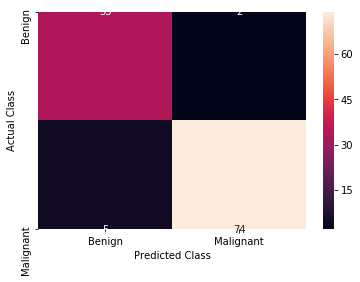

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Printing confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot = True, fmt = '.0f', 
        xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')